Part 1 - Exploratory data analysis

Kellin Pelrine

In [0]:
import pandas as pd
with open('logins.json', 'r') as f:
  logins = pd.read_json(f)

In [26]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [27]:
logins.info()
logins.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [0]:
logins['counter'] = 1
logins = logins.set_index('login_time')
logins = logins.sort_index()
logins_15m = logins.rolling('900s').sum()

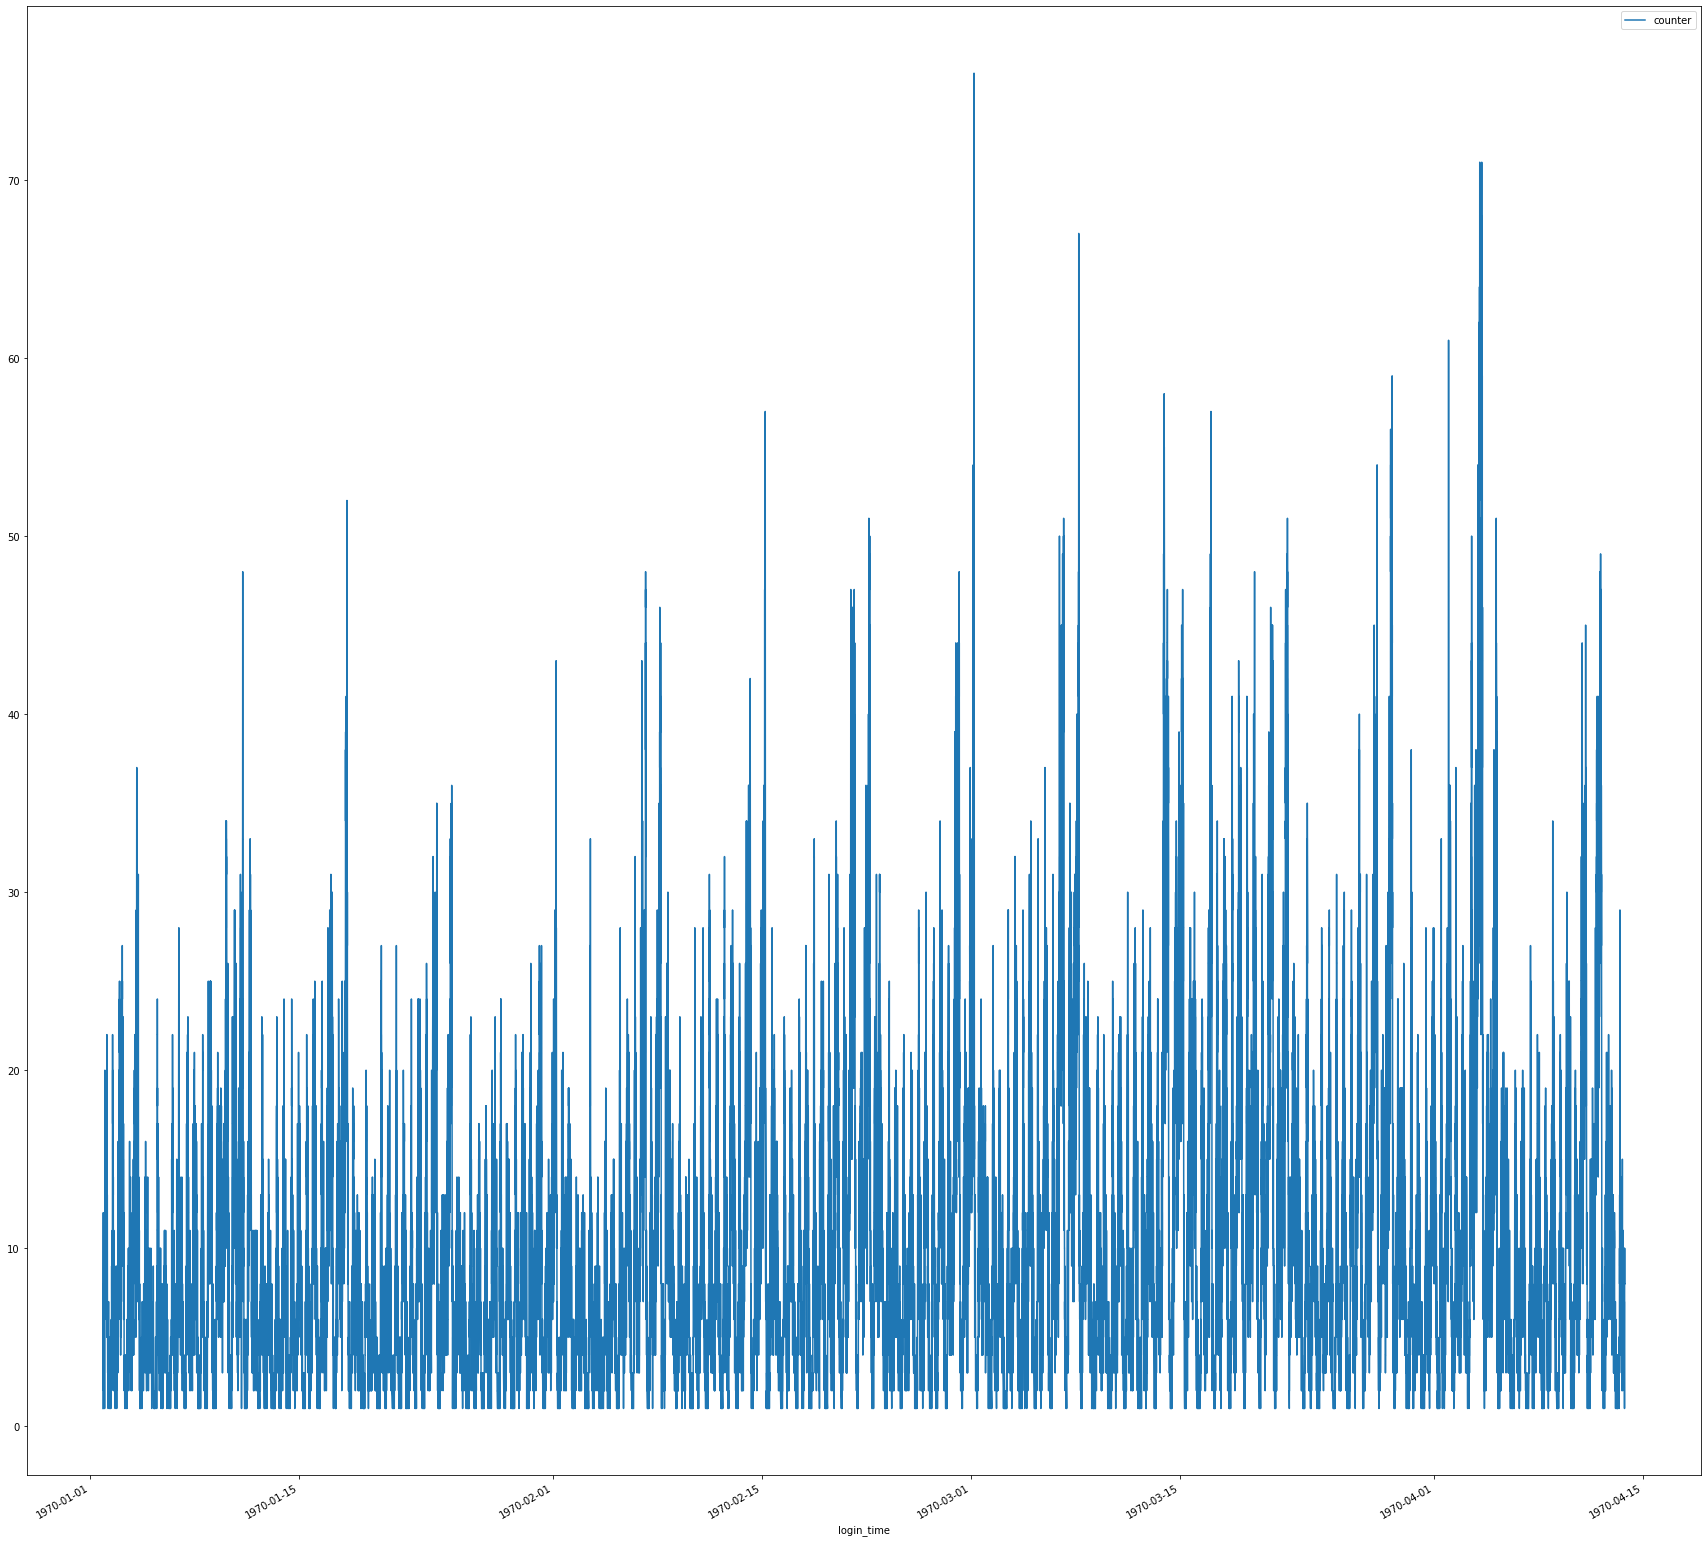

In [35]:
import matplotlib.pyplot as plt
logins_15m.plot(figsize=(30,30))
plt.show()

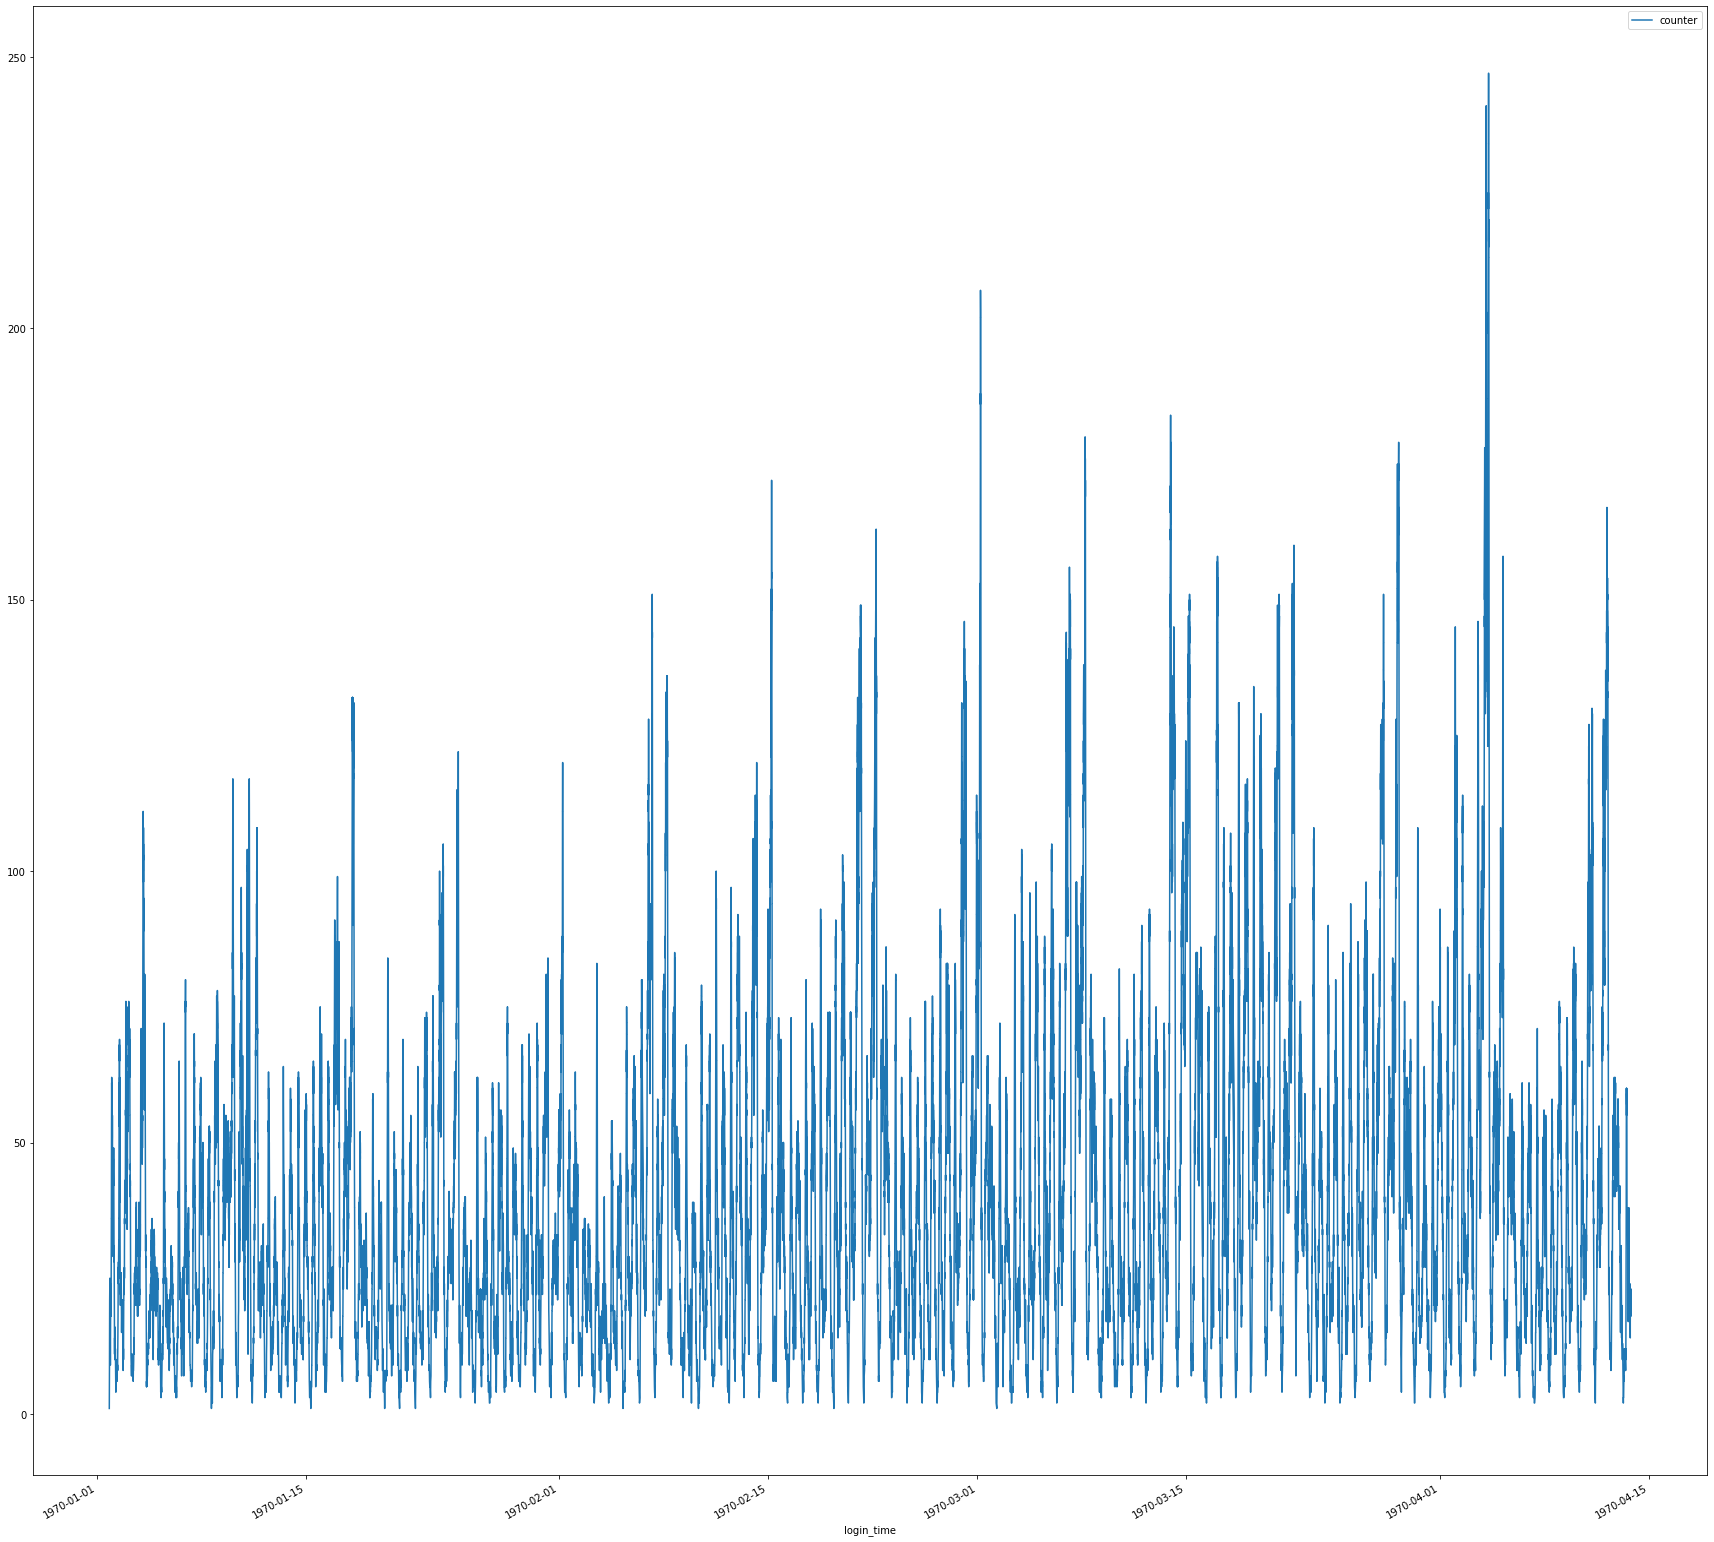

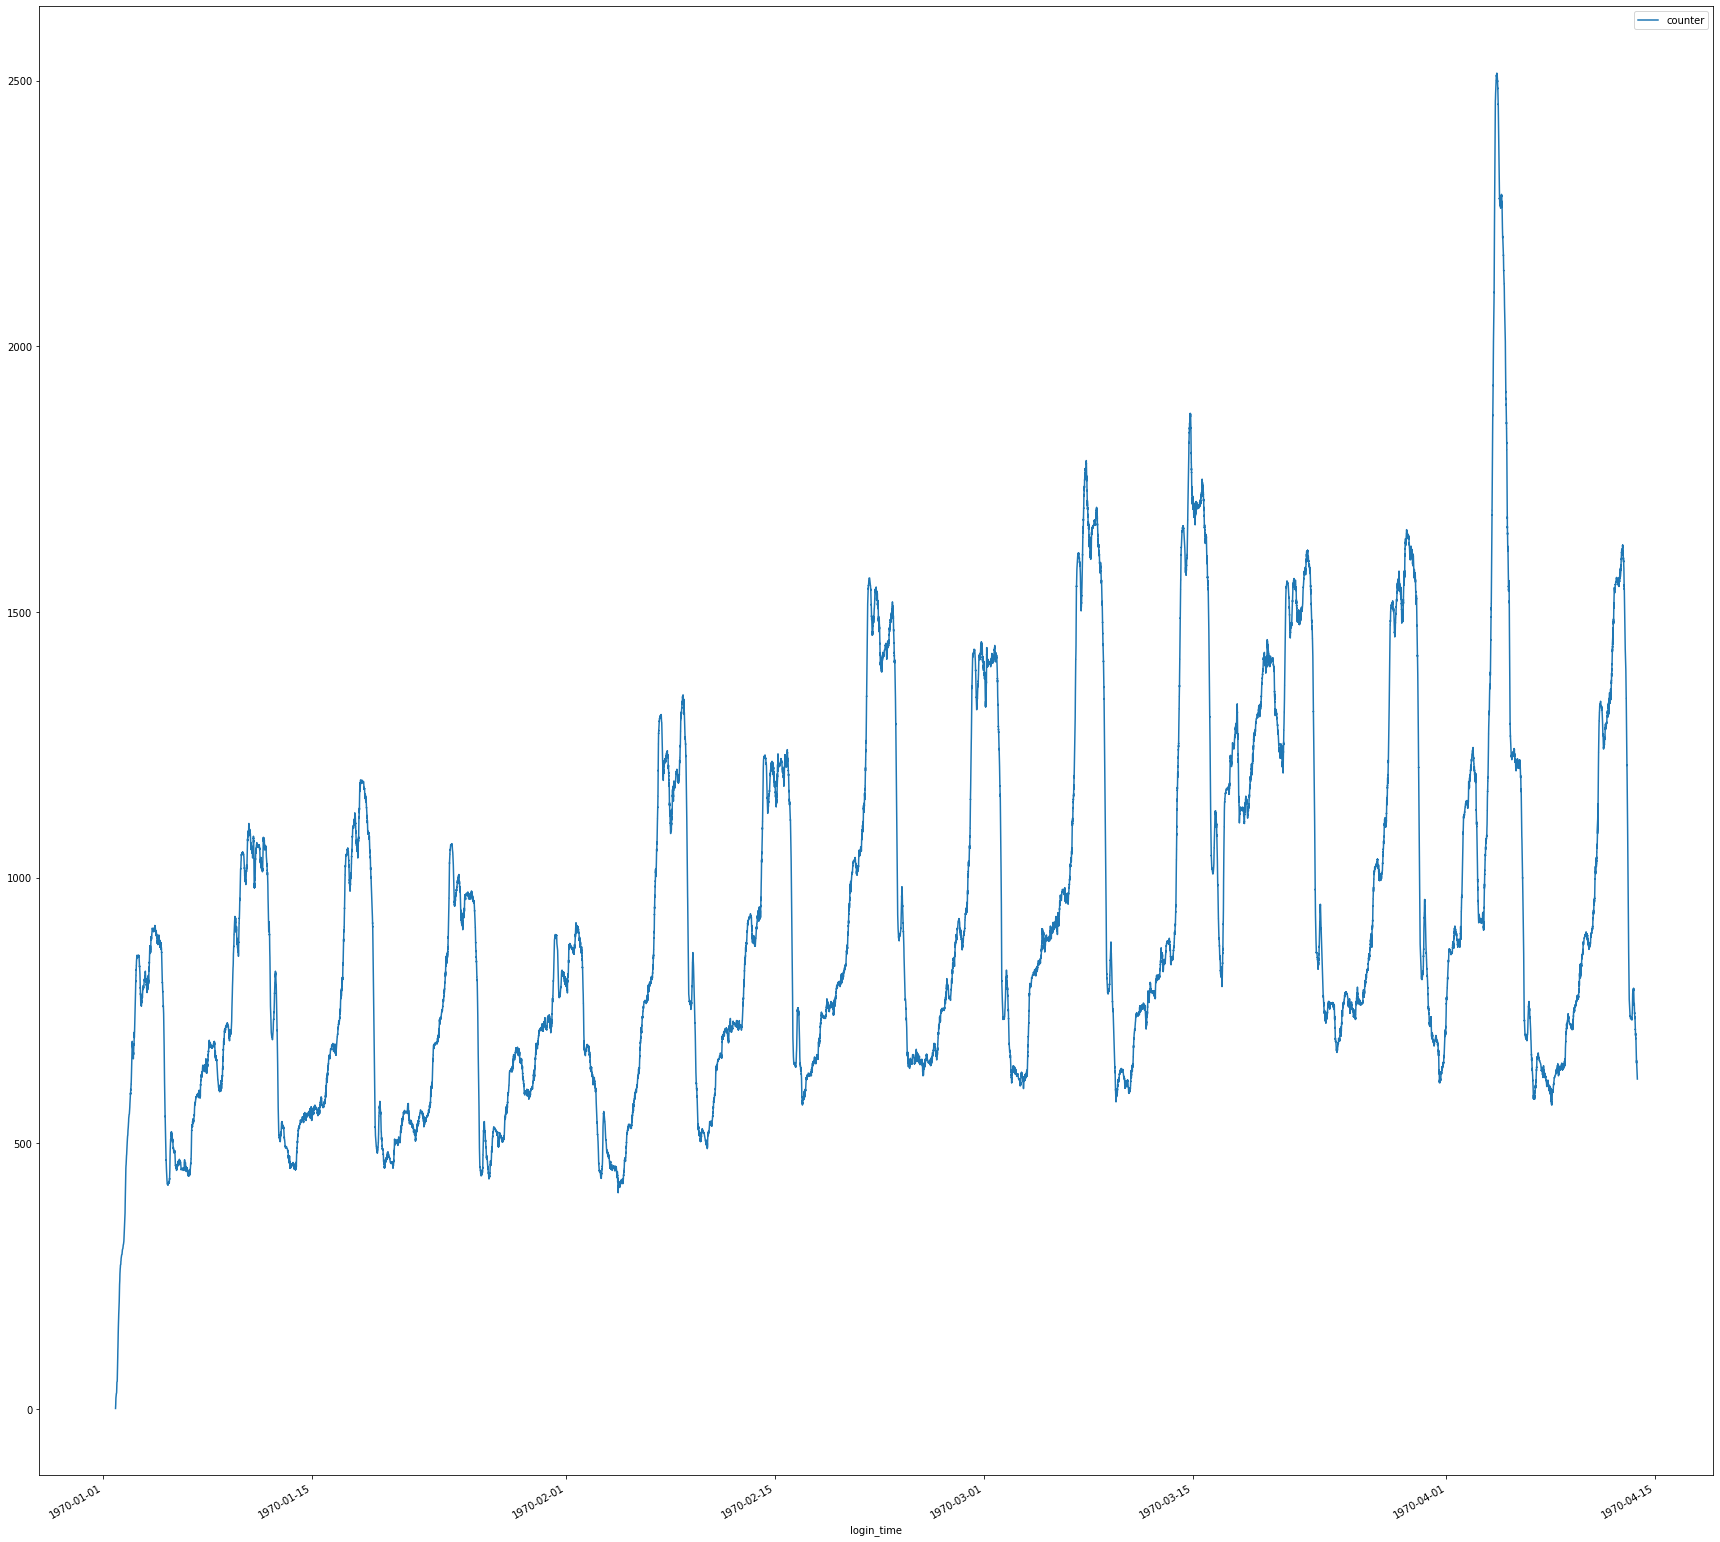

In [37]:
# we can see some periodicity, but it's hard to interpret. Let's try to make it clearer.

logins_1h = logins.rolling('3600s').sum()
logins_1h.plot(figsize=(30,30))
plt.show()
logins_1d = logins.rolling('1d').sum()
logins_1d.plot(figsize=(30,30))
plt.show()

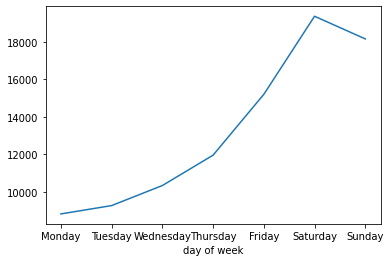

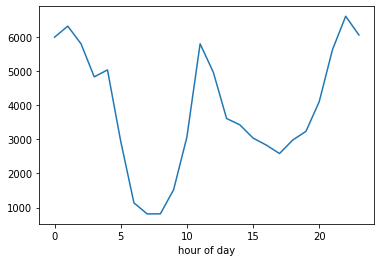

In [50]:
# better, but let's look at some more aggregated numbers...

logins['day of week'] = logins.index.day_name()
names = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
logins.groupby('day of week')['counter'].sum().reindex(names).plot()
plt.show()

logins['hour of day'] = logins.index.hour
logins.groupby('hour of day')['counter'].sum().plot()
plt.show()

In [71]:
# Above we observe a clear increase in logins towards the weekend. 
# We also observe more logins in the late morning and from about 21:00 to 4:00.

# Now, let's do some checks for missing data. 
# There's no explicitly missing entries, but that doesn't rule out the data collection failing entirely at times...
empty_periods = logins.index[1:] - logins.index[:len(logins.index) - 1]

max_loginless = pd.Series(empty_periods).nlargest(50)
print('Maximum time without a login: ', max_loginless.head())
print('Maximum time without a login: ', logins.iloc[max_loginless.index[:50]])

Average time without a login:  0 days 00:01:34.569759
Standard deviation of time without a login:  0 days 00:02:50.128176
Maximum time without a login:  4401    01:31:41
35878   01:20:08
14302   01:07:38
13737   01:06:55
28305   01:05:39
Name: login_time, dtype: timedelta64[ns]
Maximum time without a login:                       counter day of week  hour of day
login_time                                           
1970-01-08 14:54:06        1    Thursday           14
1970-02-19 07:52:38        1    Thursday            7
1970-01-22 07:17:34        1    Thursday            7
1970-01-21 05:50:11        1   Wednesday            5
1970-02-10 06:22:20        1     Tuesday            6
1970-03-02 06:04:19        1      Monday            6
1970-01-15 07:10:41        1    Thursday            7
1970-01-20 05:55:37        1     Tuesday            5
1970-02-05 05:12:17        1    Thursday            5
1970-02-04 06:00:36        1   Wednesday            6
1970-02-25 06:15:50        1   Wednesday  

In [0]:
# We can see above that long periods without logins tend to be at less busy times (especially early morning) and less busy days of the week.
# This suggests that they are legitimate, not due to logging errors, though one could certainly analyze this in further depth.